In [4]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [7]:
dir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/"

In [5]:
data = ert.load(dir + '21Aug/t12_v1_ws.tx0')

27/02/25 - 12:40:14 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
27/02/25 - 12:40:14 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
27/02/25 - 12:40:14 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
27/02/25 - 12:40:14 - pyGIMLi - INFO - No electrode positions found!
27/02/25 - 12:40:14 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 565


In [6]:
data

Data: Sensors: 48 data: 565, nonzero entries: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'm', 'n', 'rhoa', 'u', 'valid']

load, save then manually change the coordinates, ONLY RUN ONCE!

In [8]:
h1_ws = ert.load(dir + '20Aug/t12_h1_ws.tx0')
#h1_dd = ert.load(dir + '20Aug/t12_h1_dd.dat')
v1_ws = ert.load(dir + '21Aug/t12_v1_ws.tx0')
#mon = ert.load(dir + '22Aug/test2024-08-22_20-09-16.dat')

h1_ws.save(dir + '20Aug/t12_h1_ws.txt', "a b m n err rhoa")
v1_ws.save(dir + '21Aug/t12_v1_ws.txt', "a b m n err rhoa")
#mon.save(dir + '22Aug/test2024-08-22_20-09-16.txt', "a b m n err rhoa")


02/06/25 - 15:09:19 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
02/06/25 - 15:09:19 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
02/06/25 - 15:09:19 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
02/06/25 - 15:09:19 - pyGIMLi - INFO - No electrode positions found!
02/06/25 - 15:09:19 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 565
02/06/25 - 15:09:19 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
02/06/25 - 15:09:19 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
02/06/25 - 15:09:19 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
02/06/25 - 15:09:19 - pyGIMLi - INFO - No electrode positions found!
02/06/25 - 15:09:19 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 565


1

In [4]:
h1_ws = ert.load(dir + '20Aug/t12_h1_ws.txt')
v1_ws = ert.load(dir + '21Aug/t12_v1_ws.txt')
mon = ert.load(dir + '22Aug/test2024-08-22_20-09-16.txt')

tuktuk = [h1_ws, v1_ws, mon]

In [7]:
def geom_error(data):
    # Set sensor positions
    #data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))

    # Create geometric factors and add to the data
    data['k'] = ert.createGeometricFactors(data, numerical=True)

    # Create an ERT Manager instance
    mgr = ert.ERTManager(sr=False)

    # Calculate the geometric factors without numerical option
    k0 = ert.createGeometricFactors(data)

    data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
    
    ert.show(data, data['err']*100)

    return data, mgr, k0


27/09/24 - 08:51:28 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
27/09/24 - 08:51:32 - pyGIMLi - INFO - Save RVector binary
27/09/24 - 08:51:32 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5827596863117471895
27/09/24 - 08:51:32 - pyGIMLi - WARNING - Sensor z-coordinates not equal. Is there topography?
27/09/24 - 08:51:32 - pyGIMLi - INFO - Calculate analytical flat earth geometric factors.
27/09/24 - 08:51:32 - pyGIMLi - INFO - Save RVector binary
27/09/24 - 08:51:32 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2871382889549172674
27/09/24 - 08:51:33 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
27/09/24 - 08:51:35 - pyGIMLi - INFO - Save RVector binary
27/09/24 - 08:51:35 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5440172299098377015
27/09/24 - 08:51:35 - pyGIMLi - WARNING - Sensor z-coordinates not equal. Is there top

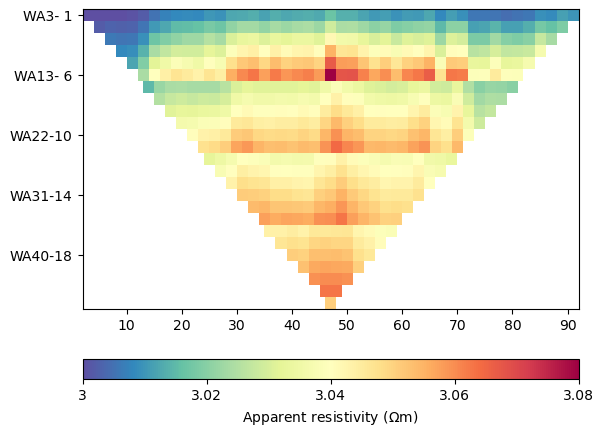

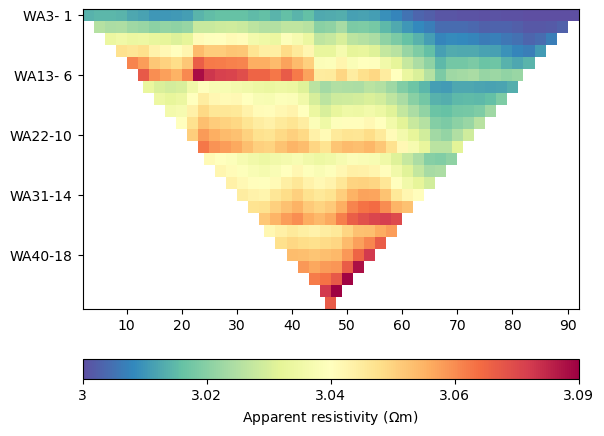

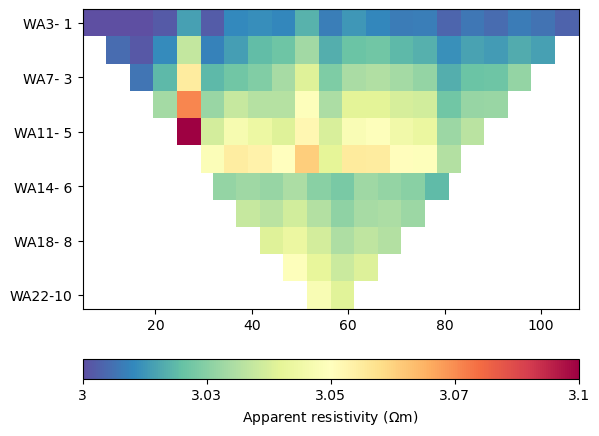

In [8]:

for item in tuktuk:
 geom_error(item)

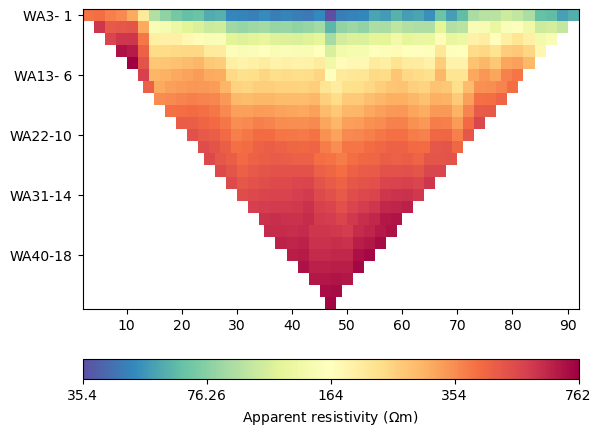

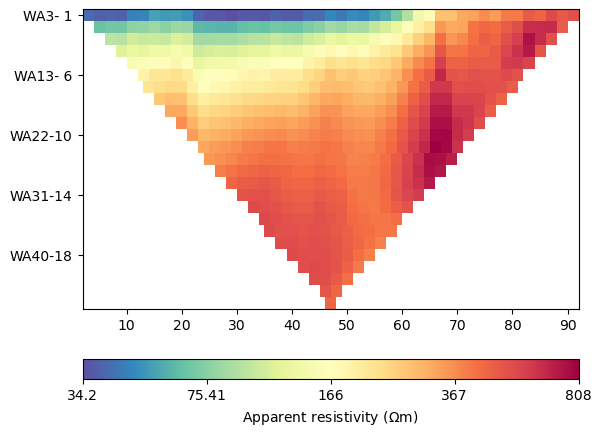

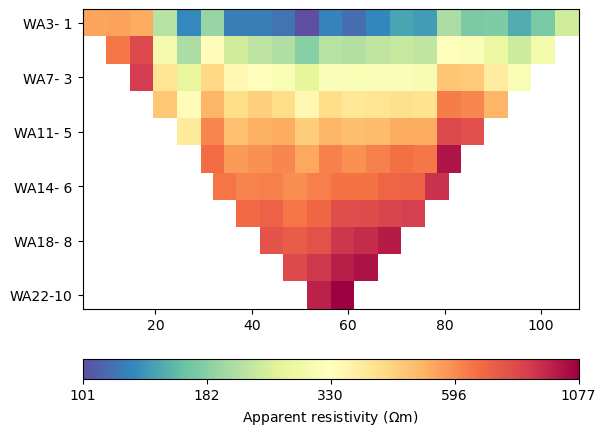

In [9]:
for item in tuktuk:
    ert.showData(item)

27/09/24 - 08:59:08 - pyGIMLi - INFO - Found 2 regions.
27/09/24 - 08:59:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/09/24 - 08:59:08 - pyGIMLi - INFO - Found 2 regions.
27/09/24 - 08:59:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/09/24 - 08:59:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
27/09/24 - 08:59:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/09/24 - 08:59:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2299 Cells: 4240 Boundaries: 3358
27/09/24 - 08:59:08 - pyGIMLi - INFO - Use median(data values)=323.872
27/09/24 - 08:59:08 - pyGIMLi - INFO - Created startmodel from forward operator: 876, min/max=323.872000/323.872000
27/09/24 - 08:59:08 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000029404DB6A70>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002940320D4E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029403525D20>
min/max (data): 35.4/762
min/max (error): 3%/3.08%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  533.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   55.77 (dPhi = 89.41%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   33.85 (dPhi = 37.64%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.95 (dPhi = 92.21%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <=

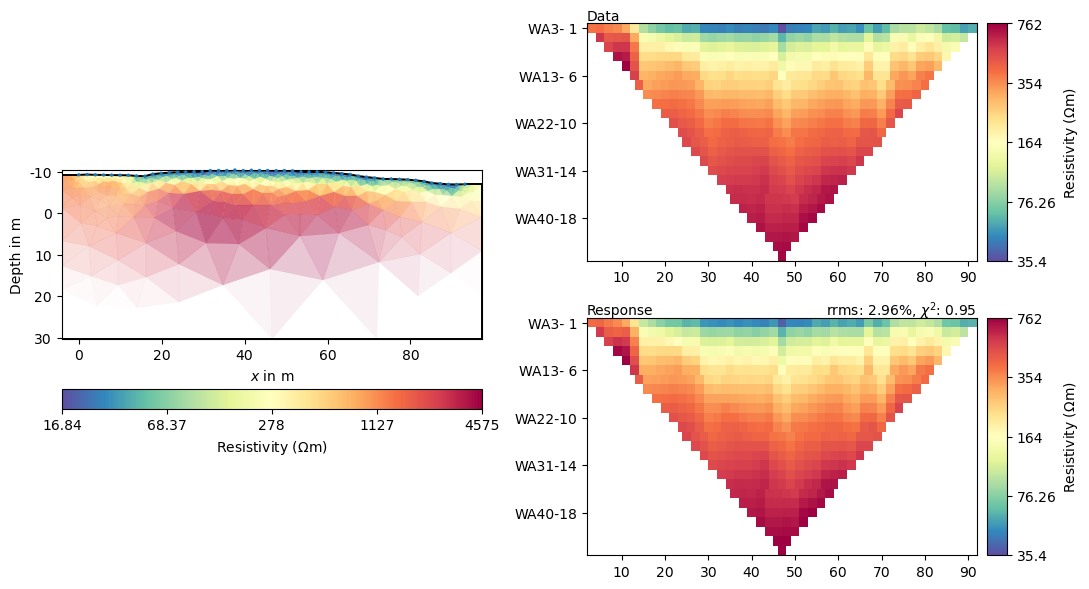

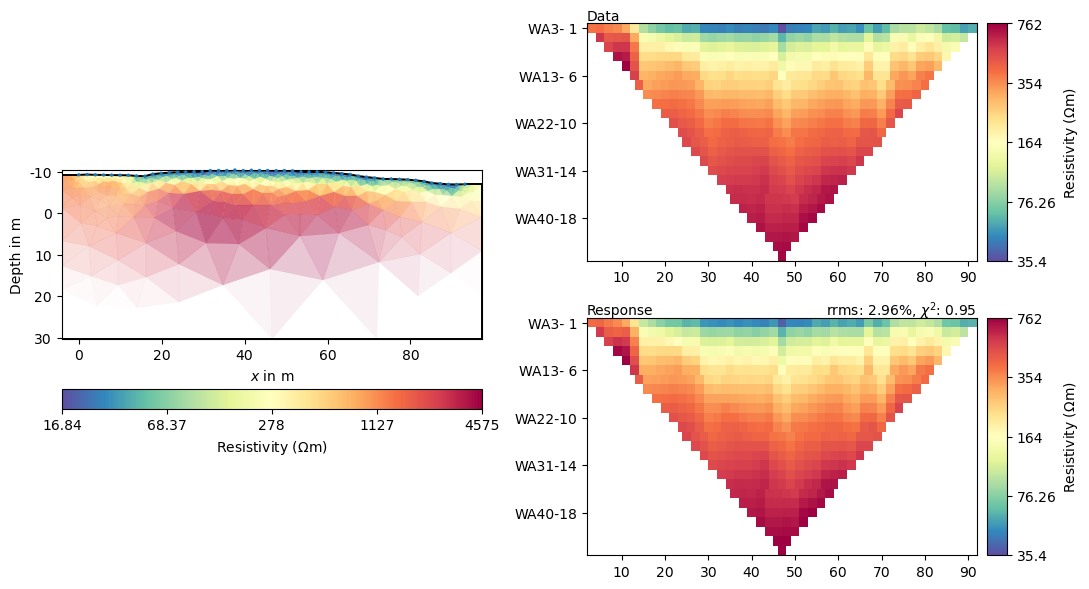

In [13]:
mgr = ert.ERTManager(item)
mgr.invert(tuktuk[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

27/09/24 - 08:59:40 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/tuktuk_h1\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/tuktuk_h1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

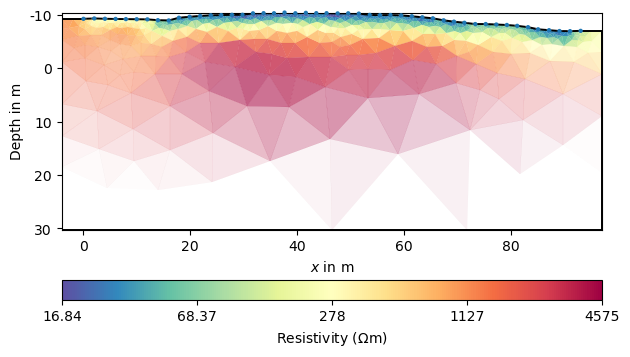

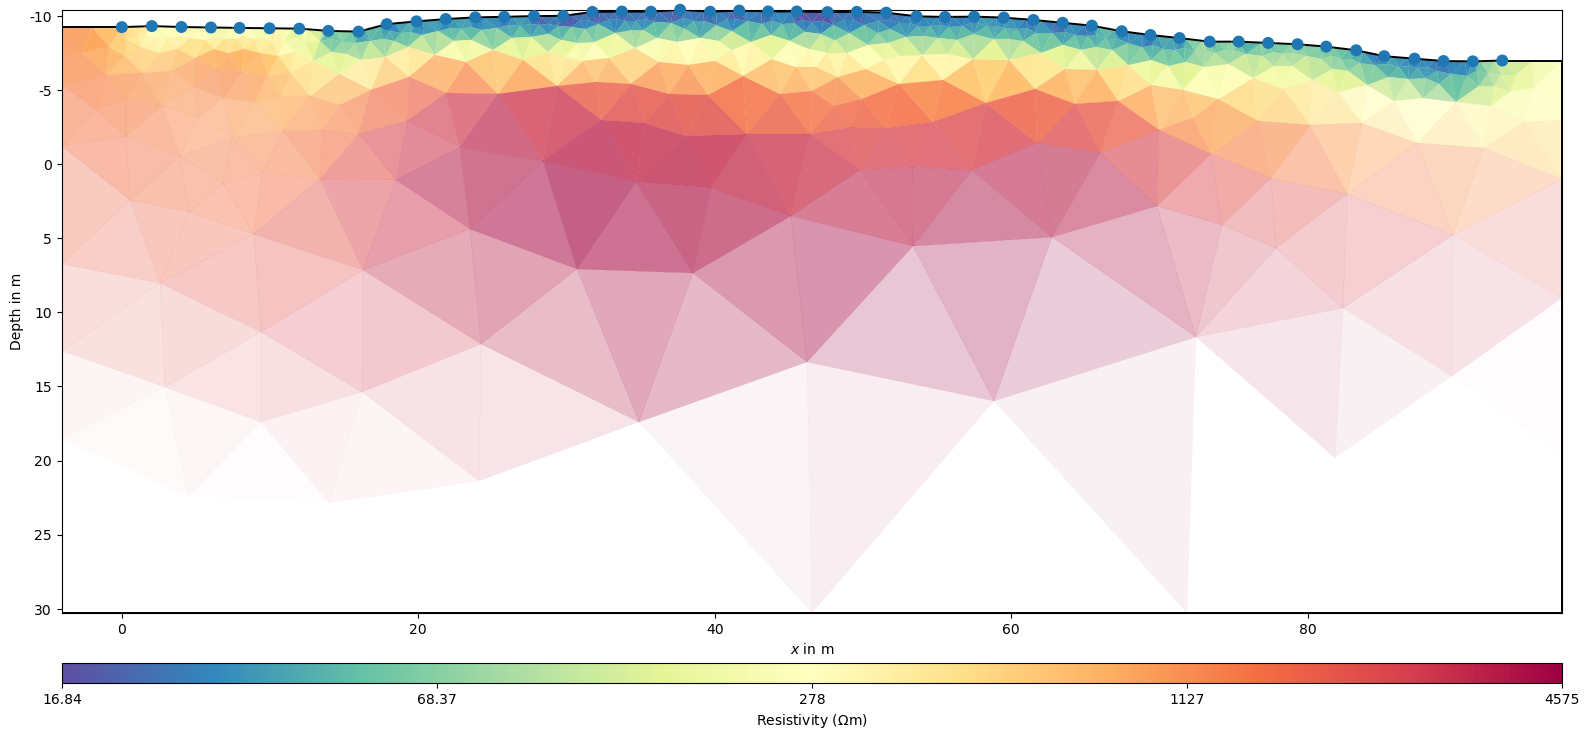

In [14]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/tuktuk_h1')

27/09/24 - 09:00:16 - pyGIMLi - INFO - Found 2 regions.
27/09/24 - 09:00:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/09/24 - 09:00:16 - pyGIMLi - INFO - Found 2 regions.
27/09/24 - 09:00:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/09/24 - 09:00:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
27/09/24 - 09:00:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/09/24 - 09:00:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2448 Cells: 4540 Boundaries: 3582
27/09/24 - 09:00:16 - pyGIMLi - INFO - Use median(data values)=369.416
27/09/24 - 09:00:16 - pyGIMLi - INFO - Created startmodel from forward operator: 938, min/max=369.416000/369.416000
27/09/24 - 09:00:16 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000294030C9990>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000294175989F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000029417575AF0>
min/max (data): 34.2/808
min/max (error): 3%/3.09%
min/max (start model): 369/369
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  662.31
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   69.28 (dPhi = 89.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   33.17 (dPhi = 50.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    7.63 (dPhi = 71.38%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.61 (dPhi = 52.77%) lam: 20

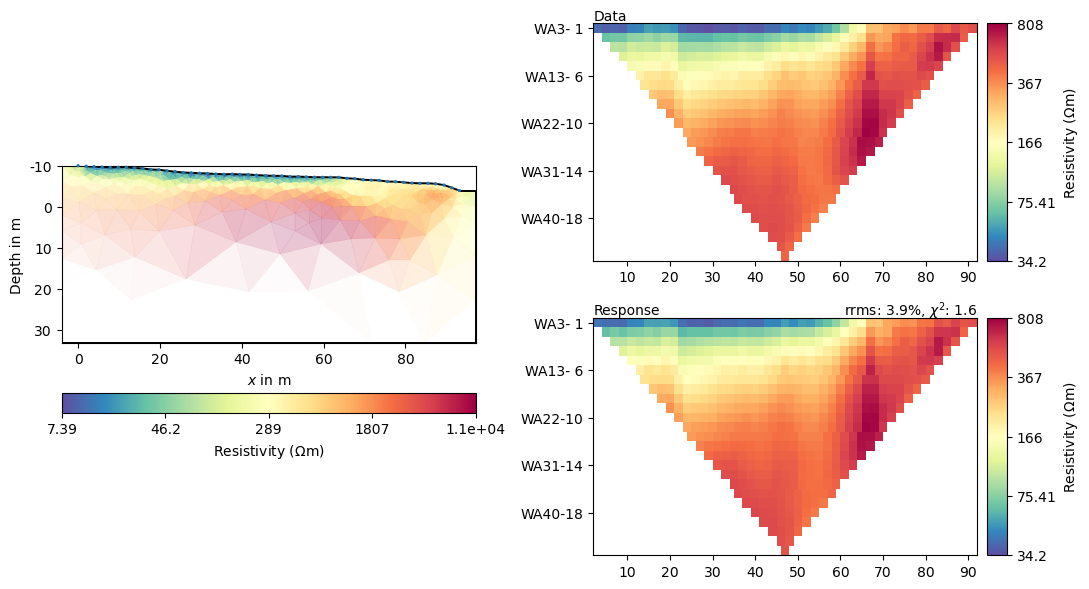

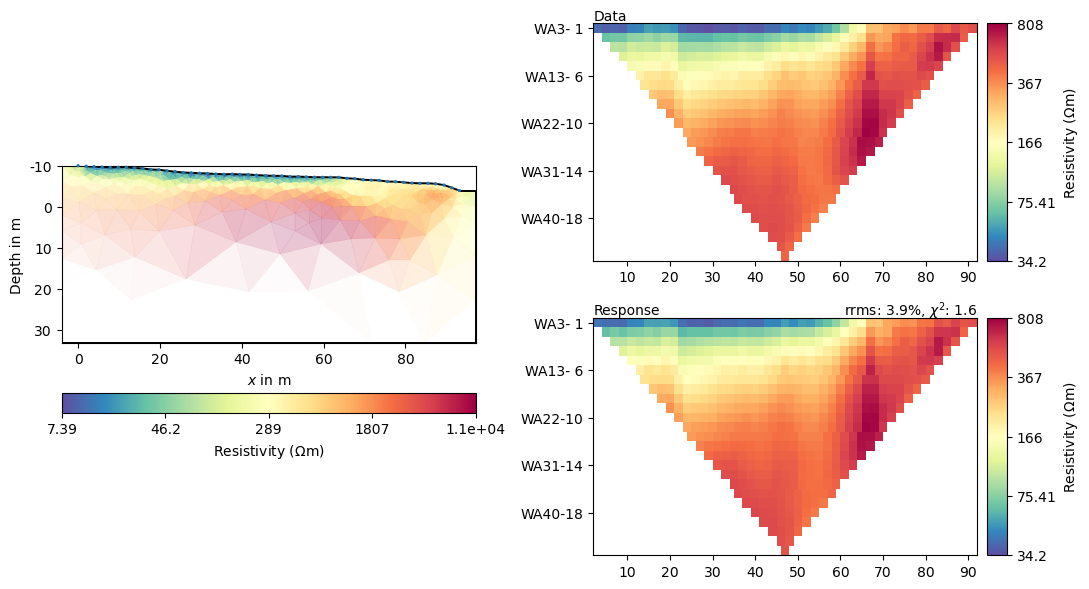

In [15]:
mgr = ert.ERTManager(item)
mgr.invert(tuktuk[1], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

27/09/24 - 09:00:52 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/tuktuk_v1\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/tuktuk_v1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

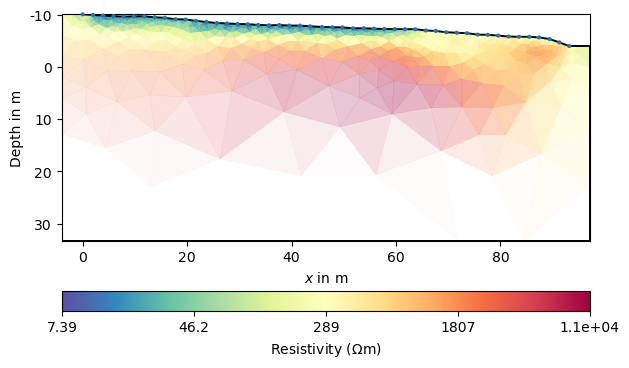

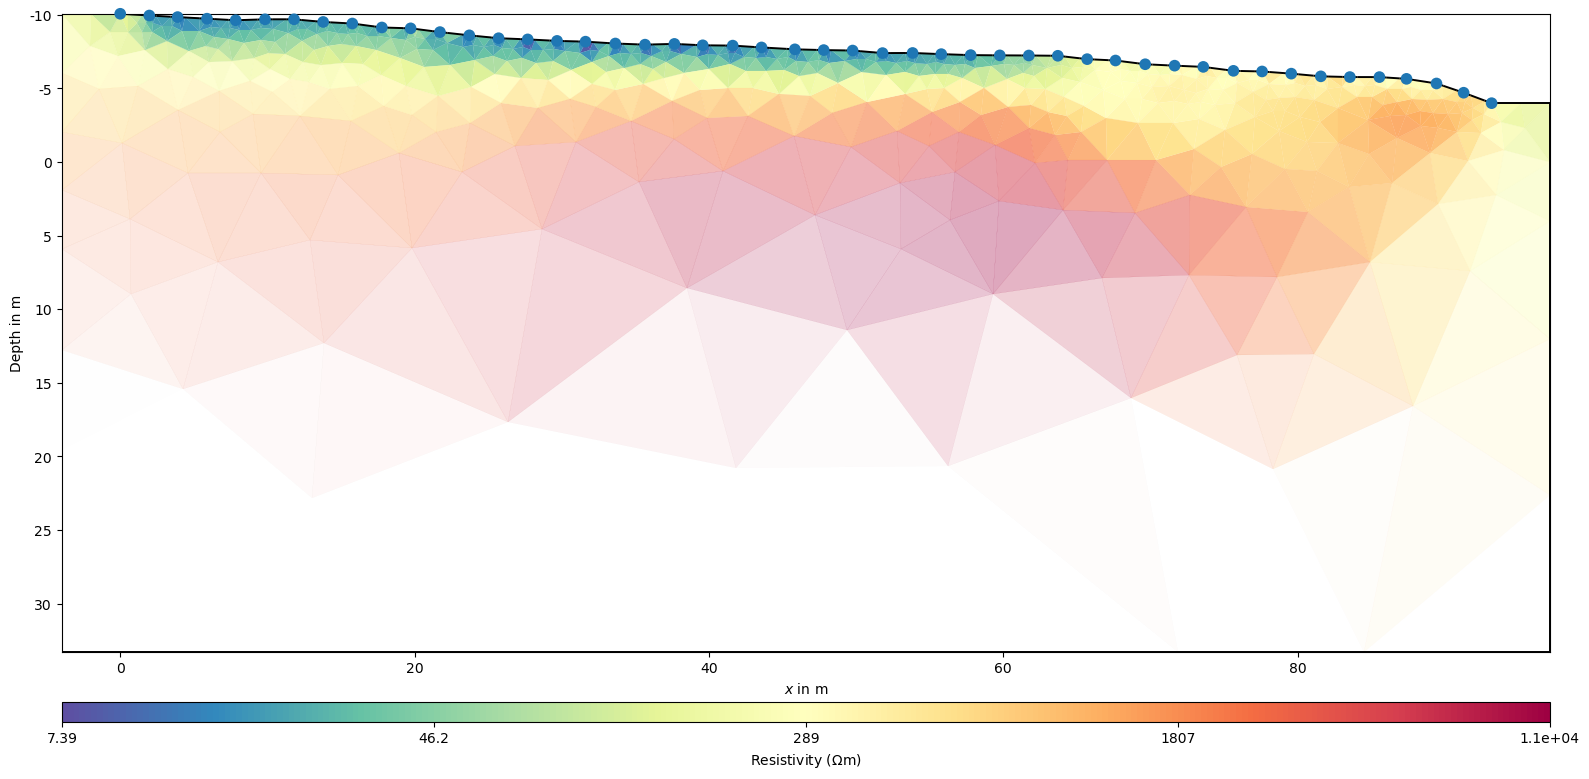

In [16]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/tuktuk_v1')

27/09/24 - 09:01:22 - pyGIMLi - INFO - Found 2 regions.
27/09/24 - 09:01:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/09/24 - 09:01:22 - pyGIMLi - INFO - Found 2 regions.
27/09/24 - 09:01:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/09/24 - 09:01:22 - pyGIMLi - INFO - Creating forward mesh from region infos.


27/09/24 - 09:01:22 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/09/24 - 09:01:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1374 Cells: 2540 Boundaries: 2008
27/09/24 - 09:01:22 - pyGIMLi - INFO - Use median(data values)=471.8535
27/09/24 - 09:01:22 - pyGIMLi - INFO - Created startmodel from forward operator: 448, min/max=471.853500/471.853500
27/09/24 - 09:01:22 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000029404B87880>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000294195E3E20>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000294192FC900>
min/max (data): 101/1077
min/max (error): 3%/3.1%
min/max (start model): 472/472
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  400.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   46.35 (dPhi = 88.04%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   12.34 (dPhi = 67.83%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.21 (dPhi = 68.49%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.23 (dPhi = 1.06%) lam: 20.0

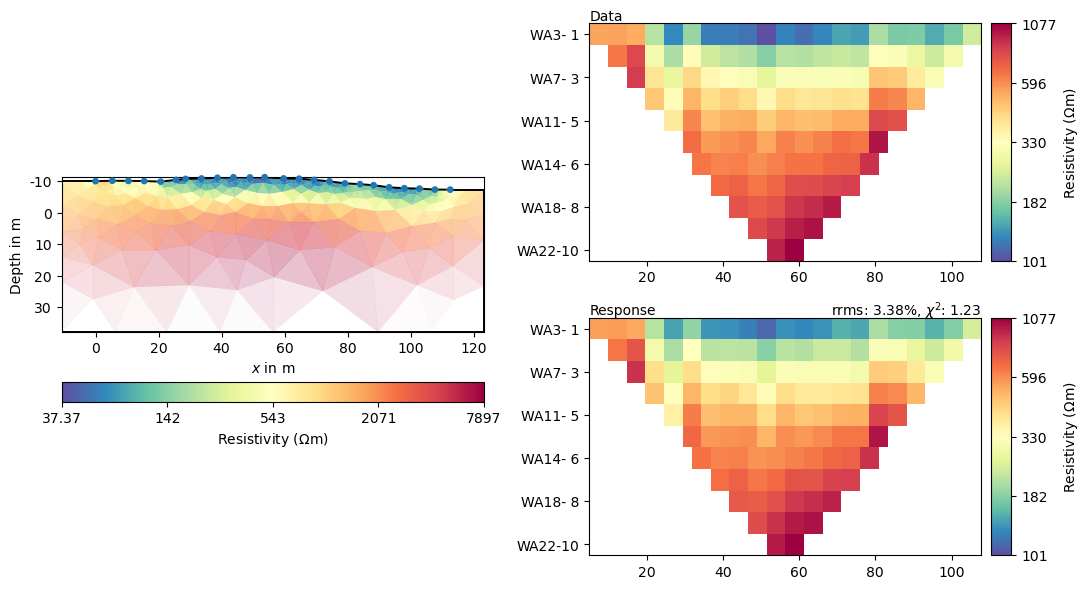

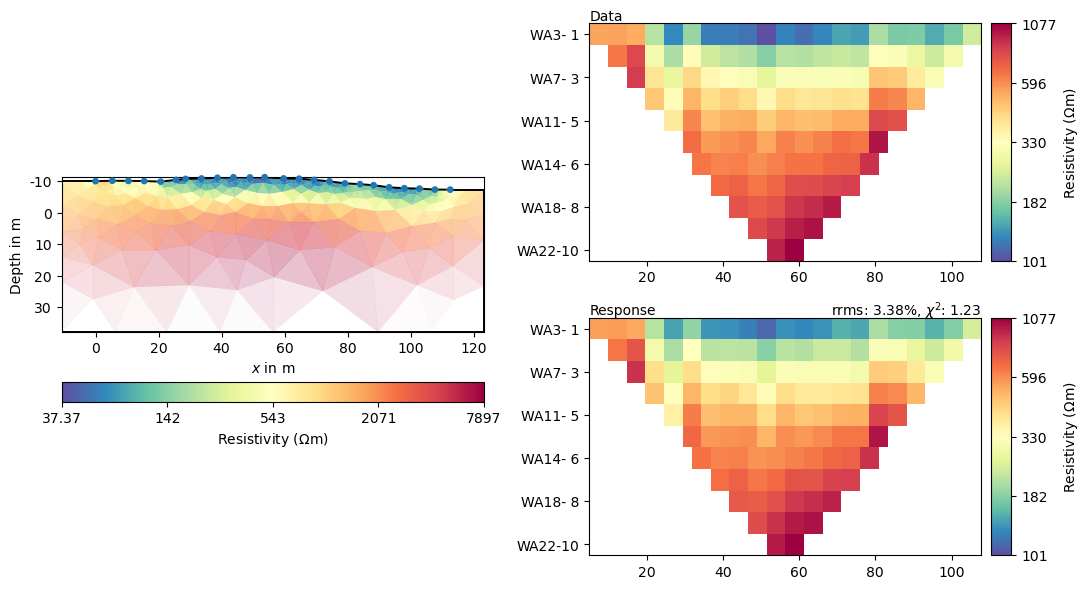

In [17]:
mgr = ert.ERTManager(item)
mgr.invert(tuktuk[2], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

27/09/24 - 09:01:39 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/tuktuk_mon\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/tuktuk_mon\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

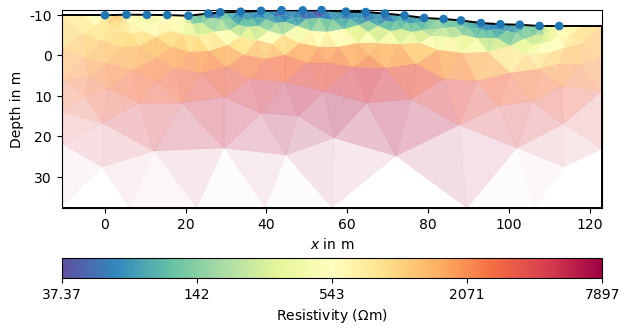

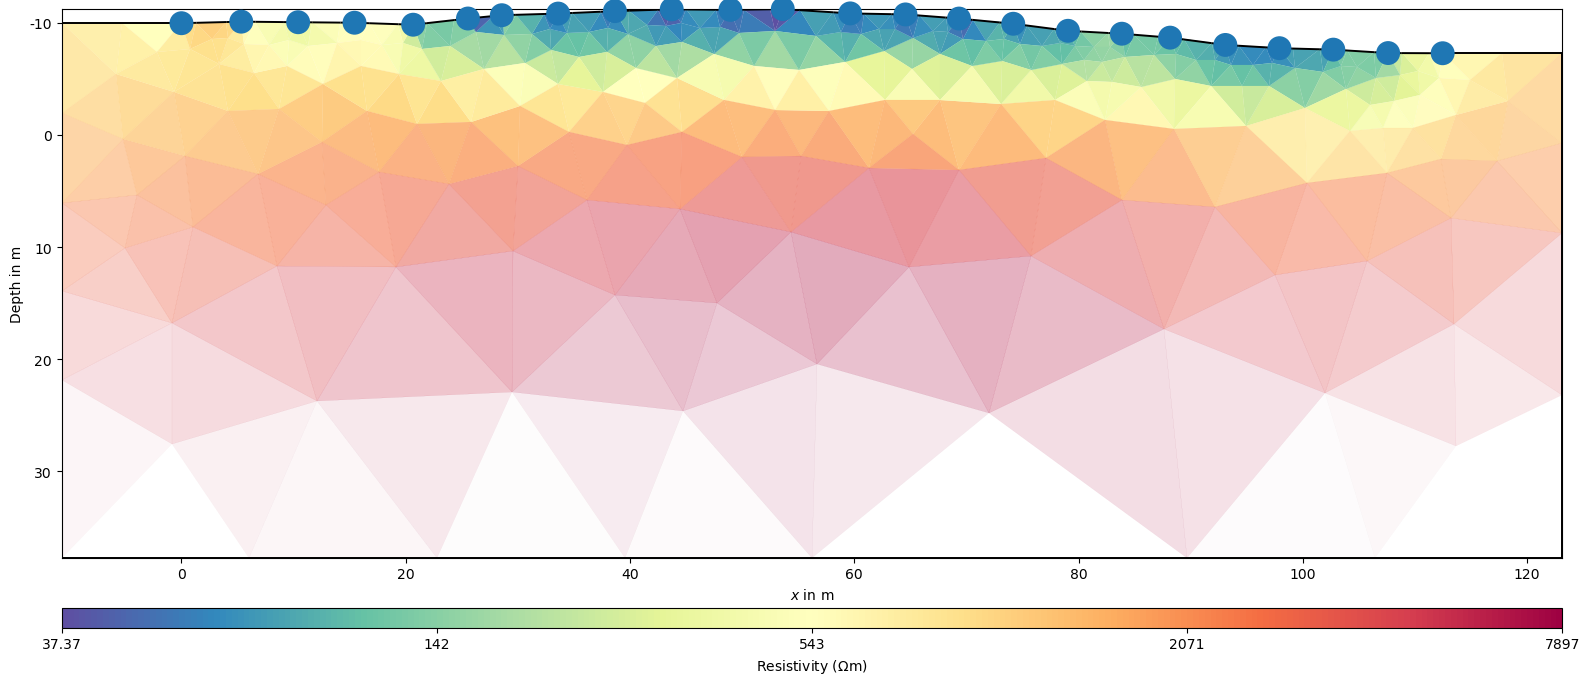

In [18]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/tuktuk_mon')

In [20]:
mesh_v1 = pg.load(dir+'all_inversions/tuktuk_v1/ERTManager/resistivity-pd.bms')
res_v1 = pg.load(dir+'all_inversions/tuktuk_v1/ERTManager/resistivity.vector')
cov_v1 = pg.load(dir+'all_inversions/tuktuk_v1/ERTManager/resistivity-cov.vector')

mesh_h1 = pg.load(dir+'all_inversions/tuktuk_h1/ERTManager/resistivity-pd.bms')
res_h1 = pg.load(dir+'all_inversions/tuktuk_h1/ERTManager/resistivity.vector')
cov_h1 = pg.load(dir+'all_inversions/tuktuk_h1/ERTManager/resistivity-cov.vector')

mesh_mon = pg.load(dir+'all_inversions/tuktuk_mon/ERTManager/resistivity-pd.bms')
res_mon = pg.load(dir+'all_inversions/tuktuk_mon/ERTManager/resistivity.vector')
cov_mon = pg.load(dir+'all_inversions/tuktuk_mon/ERTManager/resistivity-cov.vector')

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_63240\1111951626.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_63240\1111951626.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


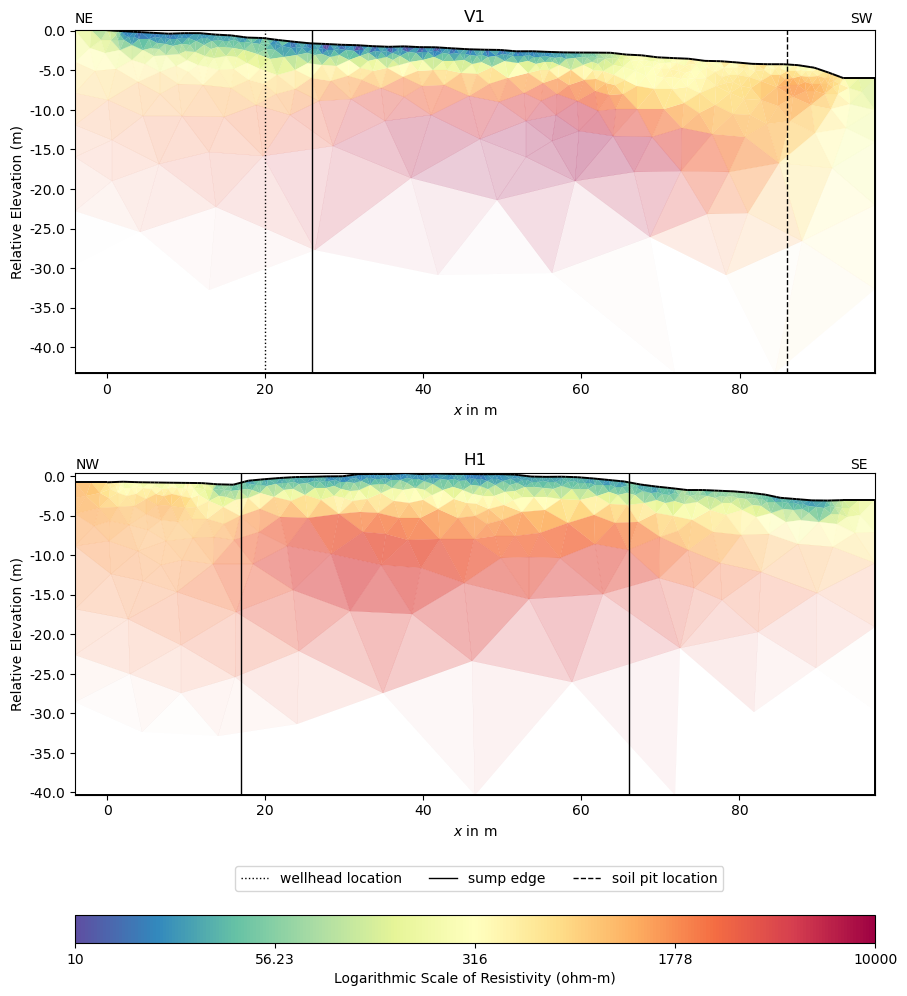

In [99]:
from cProfile import label
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(2, 1, figsize=(10, 14))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_v1, res_v1, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_v1, sharex=True)
pg.show(mesh_h1, res_h1, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_h1, sharex=True)


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")


cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('V1')
ax[1].set_title('H1')

ax[0].axvline(20, linewidth=1, linestyle=":", color='black', label='wellhead location')
ax[0].axvline(26, linewidth=1, color='black', label='sump edge')
#ax[0].axvline(52, linewidth=1, color='blue')
ax[0].axvline(86, linewidth=1, linestyle="--", color='black', label='soil pit location')

ax[1].axvline(66, linewidth=1, color='black', label='sump edge')
ax[1].axvline(17, linewidth=1, color='black', label='sump edge')
#ax[1].axvline(52, linewidth=1, color='blue')
#ax[1].axvline(86, linewidth=1, linestyle="-", color='black')

handles, labels = ax[0].get_legend_handles_labels()

ax[0].text(-4, 11, 'NE')
ax[0].text(94, 11, 'SW')
ax[1].text(-4, 11, 'NW')
ax[1].text(94, 11, 'SE')

ax[1].legend(handles=handles, labels=labels, loc=(0.2, -0.3), fontsize=10, ncol=3)

current_ticks = ax[0].get_yticks()
relative_ticks = current_ticks - 10  # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation
for i in range(len(tuktuk)-1):
    ax[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
    ax[i].set_ylabel("Relative Elevation (m)")

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_63240\1126729151.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


Text(87.09722222222221, 0.5, 'Relative Elevation (m)')

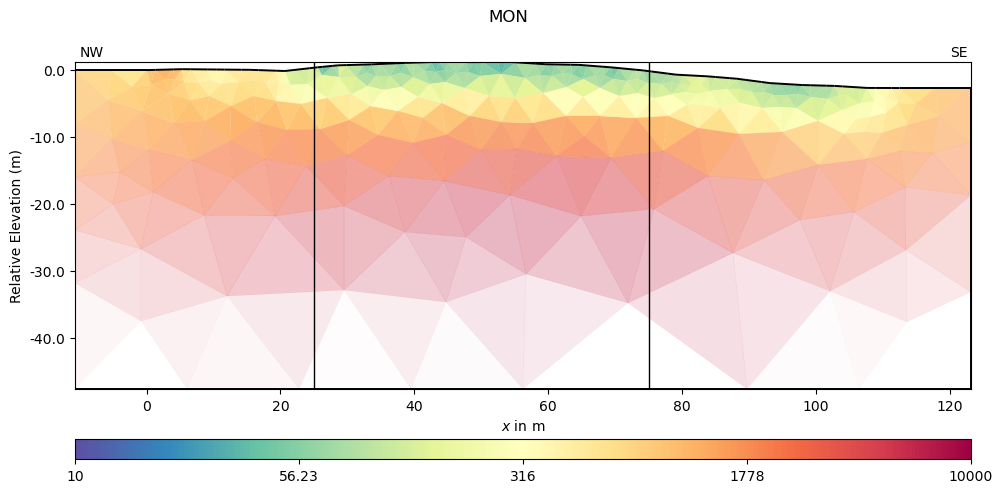

In [100]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('MON')
ax = fig.add_subplot()
pg.show(mesh_mon, res_mon, logScale=True, cMap="Spectral_r", ax=ax, colorBar=True, cMin=10, cMax=10000, coverage=cov_mon, sharex=True)

ax.axvline(25, linewidth=1, color='black', label='sump edge')
ax.axvline(75, linewidth=1, color='black', label='sump edge')

ax.text(-10, 12, 'NW')
ax.text(120, 12, 'SE')

current_ticks = ax.get_yticks()
relative_ticks = current_ticks - 10 


ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax.set_ylabel("Relative Elevation (m)")
